Projeto I
Aluno: Tiago Giugni

Bibliotecas

In [ ]:
from PIL import Image, ImageOps
import numpy as np
import matplotlib.pyplot as plt

Etapa 1

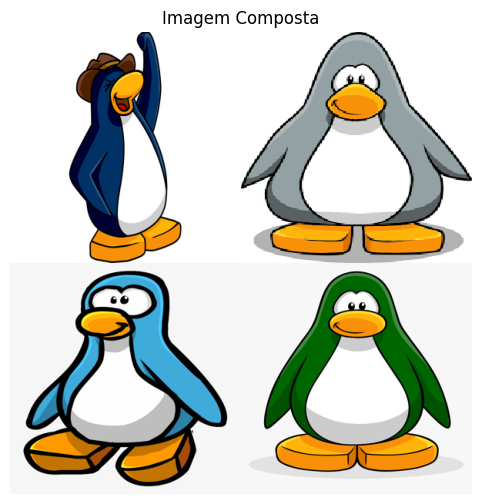

In [3]:
im1 = Image.open("P1.png")
im2 = Image.open("P2.png")
im3 = Image.open("P3.jpg")
im4 = Image.open("P4.png")

target_size = (300, 300)
im1 = im1.resize(target_size)
im2 = im2.resize(target_size)
im3 = im3.resize(target_size)
im4 = im4.resize(target_size)

composite = Image.new("RGB", (target_size[0]*2, target_size[1]*2))
composite.paste(im1, (0, 0))
composite.paste(im2, (target_size[0], 0))
composite.paste(im3, (0, target_size[1]))
composite.paste(im4, (target_size[0], target_size[1]))

plt.figure(figsize=(6,6))
plt.imshow(composite)
plt.title("Imagem Composta")
plt.axis("off")
plt.show()

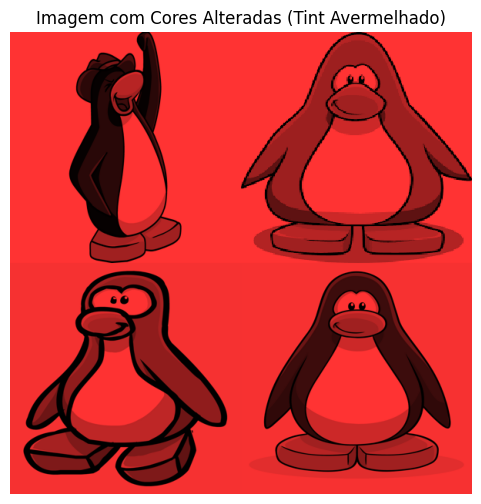

In [ ]:
gray = composite.convert("L")
gray_np = np.array(gray)
colored_np = np.zeros((gray_np.shape[0], gray_np.shape[1], 3), dtype=np.uint8)
colored_np[:,:,0] = gray_np
colored_np[:,:,1] = (gray_np * 0.2).astype(np.uint8)
colored_np[:,:,2] = (gray_np * 0.2).astype(np.uint8)
colored_img = Image.fromarray(colored_np)

plt.figure(figsize=(6,6))
plt.imshow(colored_img)
plt.title("Imagem com Cores Alteradas")
plt.axis("off")
plt.show()

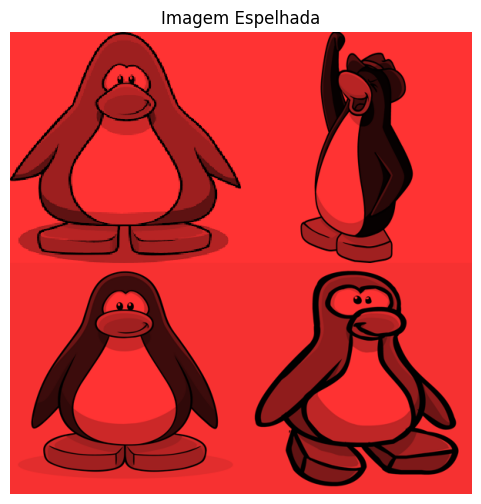

In [5]:
mirrored_img = ImageOps.mirror(colored_img)

plt.figure(figsize=(6,6))
plt.imshow(mirrored_img)
plt.title("Imagem Espelhada")
plt.axis("off")
plt.show()

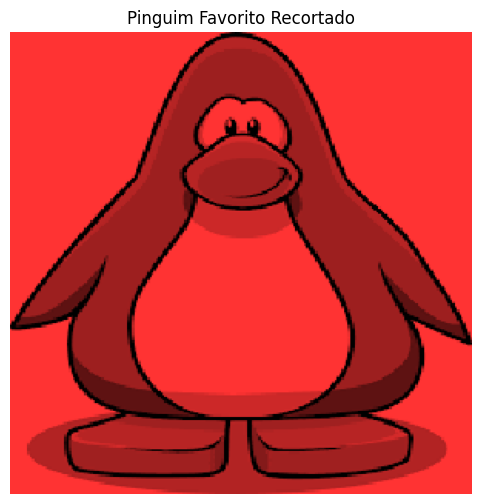

In [7]:
width, height = mirrored_img.size
cropped_img = mirrored_img.crop((0, 0, width//2, height//2))

plt.figure(figsize=(6,6))
plt.imshow(cropped_img)
plt.title("Pinguim Favorito Recortado")
plt.axis("off")
plt.show()

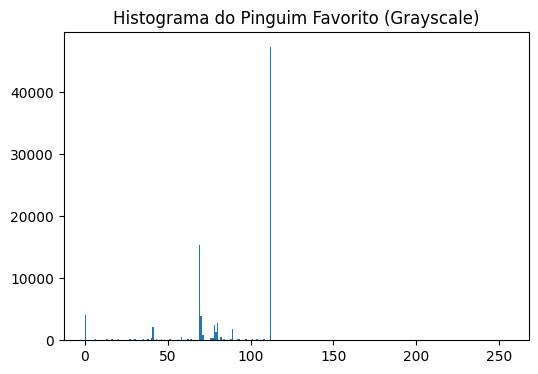

In [9]:
cropped_gray = cropped_img.convert("L")
cropped_np = np.array(cropped_gray)

plt.figure(figsize=(6,4))
plt.hist(cropped_np.ravel(), bins=256, range=(0,255))
plt.title("Histograma do Pinguim Favorito (Grayscale)")
plt.show()

threshold = 100

# 


No histograma do pinguim, observamos uma separação entre as áreas mais escuras e mais claras. Escolhi o valor 100 porque ele parece separar bem esses dois grupos, garantindo que a maior parte do corpo do pinguim seja afetada pela conversão para azul.

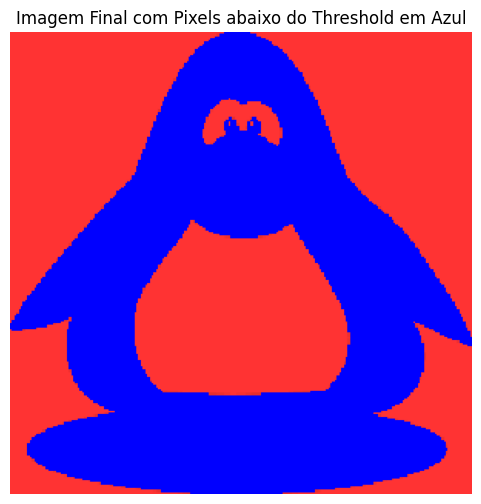

In [10]:
mask = cropped_np < threshold
final_np = np.array(cropped_img)
final_np[mask] = [0, 0, 255]
final_img = Image.fromarray(final_np)

plt.figure(figsize=(6,6))
plt.imshow(final_img)
plt.title("Imagem Final com Pixels abaixo do Threshold em Azul")
plt.axis("off")
plt.show()